                 Gradient descent from scratch

In [33]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from sklearn.linear_model import LinearRegression


In [11]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


In [12]:
X.shape,y.shape

((100, 1), (100,))

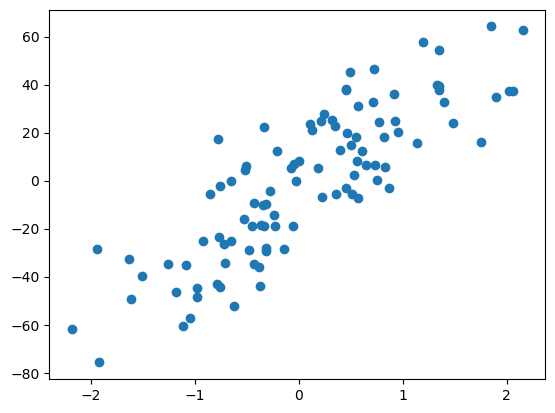

In [14]:
plt.scatter(X,y)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [18]:
lr = LinearRegression()


In [20]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)


[28.12597332]
-2.2710144261783825


In [22]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [23]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 120
        self.b = -10
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [24]:
gd = GDRegressor(0.001,50)


In [25]:
gd.fit(X_train,y_train)


28.153677411086925 -2.282094142185138


In [26]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.6343982751849051

              For plotting and shows the convergence 

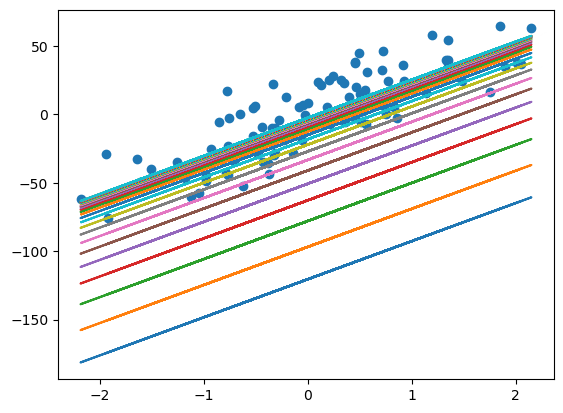

In [28]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

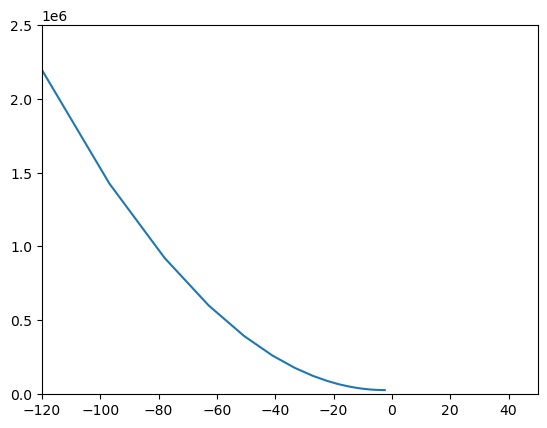

In [34]:
import matplotlib.animation

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-120,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)
